# 用以预测TL值的超大规模BPNN

## 导入依赖库

pandas用以处理矩阵数据，matplotlib用以可视化，keras用以训练后向反馈神经网络。

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense,Dropout, Activation
from keras.utils.vis_utils import plot_model

## 导入EXCEL文件中的数据

定义输入文件、输出文件、模型参数保存文件的目录，

读取excel数据，定义15个feature和1个标签，

截取前40000个example作为训练数据集。

In [123]:
inputfile = 'Dataset.xlsx'
outputfile = 'output.xls'
modelfile = 'modelweight.model'
data = pd.read_excel(inputfile,index='index',sheetname=0)
feature = ['l1','l2','l3','l4','l5',
           'p1','p2','p3','p4','p5',
           'h1','h2','h3','h4','h5']
label = ['feval']
data_train = data.loc[range(0,40000)].copy()

## 将数据归一化，提高训练效率

计算各个特征和标签的平均值和标准差，用来做线性变换将数据归一化，并转化为矩阵格式。

In [124]:
data_mean = data_train.mean()
data_std = data_train.std()
data_train = (data_train - data_mean)/data_std
x_train = data_train[feature].as_matrix()
y_train = data_train[label].as_matrix()

## 建立深度学习模型

Sequential类的模型，输入层接受15个输入，输出到第一个隐藏层的400个神经元中，其后9个隐藏层都接受400个输入并产生400个输出。输入层和隐藏层都采用ReLu作为激活函数，Dropout概率都为1%。

采用均方根误差（mse）值作为loss value，优化器使用adam。

打印summary，并将结构图保存为png文件。

In [125]:
model = Sequential()
model.add(Dense(400,input_dim=15,kernel_initializer="uniform"))
model.add(Activation('relu'))
model.add(Dropout(0.01))
model.add(Dense(400,input_dim=400,kernel_initializer="uniform"))
model.add(Activation('relu'))
model.add(Dropout(0.01))
model.add(Dense(400,input_dim=400,kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.01))
model.add(Dense(400,input_dim=400,kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.01))
model.add(Dense(400,input_dim=400,kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.01))
model.add(Dense(400,input_dim=400,kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.01))
model.add(Dense(400,input_dim=400,kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.01))
model.add(Dense(400,input_dim=400,kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.01))
model.add(Dense(400,input_dim=400,kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.01))
model.add(Dense(400,input_dim=400,kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.01))
model.add(Dense(1,input_dim=400))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
plot_model(model, to_file='bpnn_predict_model.png',show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 400)               6400      
_________________________________________________________________
activation_115 (Activation)  (None, 400)               0         
_________________________________________________________________
dropout_115 (Dropout)        (None, 400)               0         
_________________________________________________________________
dense_130 (Dense)            (None, 400)               160400    
_________________________________________________________________
activation_116 (Activation)  (None, 400)               0         
_________________________________________________________________
dropout_116 (Dropout)        (None, 400)               0         
_________________________________________________________________
dense_131 (Dense)            (None, 400)               160400    
__________

## 训练模型

迭代200次，每一次批量梯度下降使用256个样本。

In [126]:
model.fit(x_train, y_train, epochs = 200, batch_size = 256)

Epoch 1/200
40000/40000 [==============================] - 7s - loss: 0.3954     
Epoch 2/200
40000/40000 [==============================] - 6s - loss: 0.0499     
Epoch 3/200
40000/40000 [==============================] - 6s - loss: 0.0229     
Epoch 4/200
40000/40000 [==============================] - 6s - loss: 0.0165     
Epoch 5/200
40000/40000 [==============================] - 6s - loss: 0.0143     
Epoch 6/200
40000/40000 [==============================] - 6s - loss: 0.0137     
Epoch 7/200
40000/40000 [==============================] - 6s - loss: 0.0109     
Epoch 8/200
40000/40000 [==============================] - 6s - loss: 0.0129     
Epoch 9/200
40000/40000 [==============================] - 6s - loss: 0.0108     
Epoch 10/200
40000/40000 [==============================] - 6s - loss: 0.0098     
Epoch 11/200
40000/40000 [==============================] - 6s - loss: 0.0098     
Epoch 12/200
40000/40000 [==============================] - 6s - loss: 0.0090     
Epoch 13/200


## 保存模型的权值

In [127]:
model.save_weights(modelfile)

## 测试模型

将data数据归一化后使用训练的模型预测tl值，并保存到excel文件中。

In [128]:
x = ((data[feature] - data_mean[feature])/data_std[feature]).as_matrix()
data[u'feval_pred'] = model.predict(x) * data_std['feval'] + data_mean['feval']
data.to_excel(outputfile)

打印预测值（出去训练集样本）并与真实值进行对比。

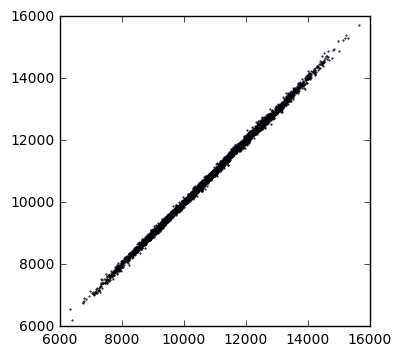

In [137]:
plt.xlim(6000, 16000)
plt.ylim(6000, 16000)
plt.gca().set_aspect(1)
plt.scatter(data['feval_pred'][40000:],data['feval'][40000:],s=1, c='b', marker='.')
plt.show()